# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [48]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import random as random

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [6]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [7]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Bob', 'Alice', 'Chuck']

Here's how we add edges between nodes.

In [8]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Bob', 'Alice'), ('Bob', 'Chuck'), ('Alice', 'Bob'), ('Alice', 'Chuck')]

And here's how to draw the graph.

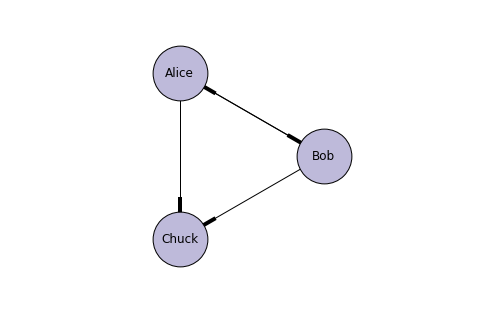

In [9]:
nx.draw_circular(G, 
                 node_color=COLORS[2], 
                 node_size=3000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

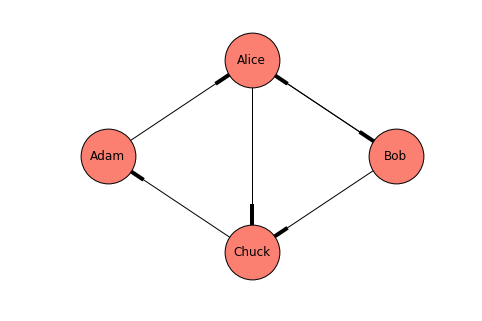

In [10]:
G.add_node("Adam")
G.add_edge("Adam","Alice")
G.add_edge("Chuck","Adam")
nx.draw_circular(G, 
                 node_color=COLORS[3], 
                 node_size=3000, 
                 with_labels=True)

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [11]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [12]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Philly', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [13]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [14]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Boston'), ('NYC', 'Philly'), ('NYC', 'Albany'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

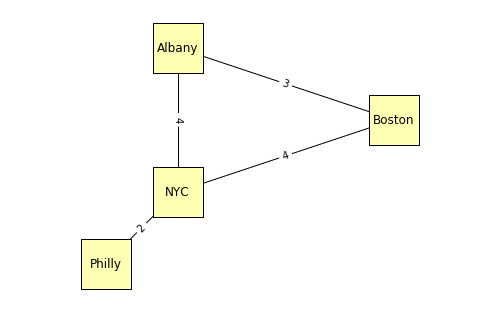

In [15]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

{('Albany', 'Boston'): <matplotlib.text.Text at 0x7fbbb97a0c10>,
 ('Albany', 'NYC'): <matplotlib.text.Text at 0x7fbbb97a0090>,
 ('Boston', 'NYC'): <matplotlib.text.Text at 0x7fbbb97ad210>,
 ('NYC', 'Philly'): <matplotlib.text.Text at 0x7fbbb97ad7d0>,
 ('NewB', 'Boston'): <matplotlib.text.Text at 0x7fbbb97a0650>,
 ('NewB', 'NYC'): <matplotlib.text.Text at 0x7fbbb9806750>}

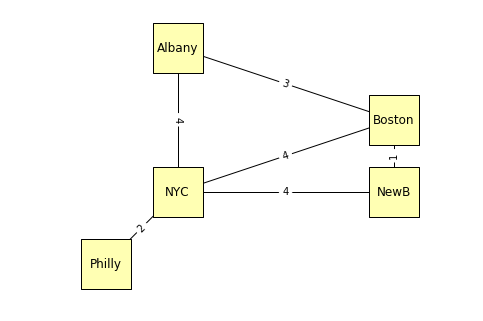

In [16]:
pos["NewB"]=(-71,41)
drive_times[("NewB","Boston")] = 1
drive_times[("NewB","NYC")] = 4
G.add_nodes_from(pos)
G.add_edges_from(drive_times)

nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)


## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [17]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [18]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [19]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

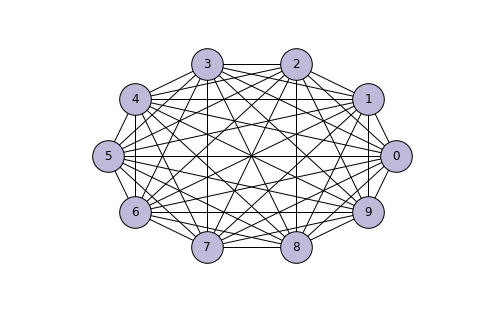

In [20]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [21]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

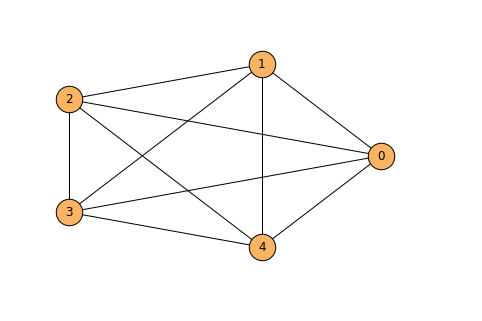

In [22]:
com5 = make_complete_graph(5)
nx.draw_circular(com5, 
                 node_color=COLORS[5], 
                 node_size=700, 
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [23]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [24]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [25]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [26]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

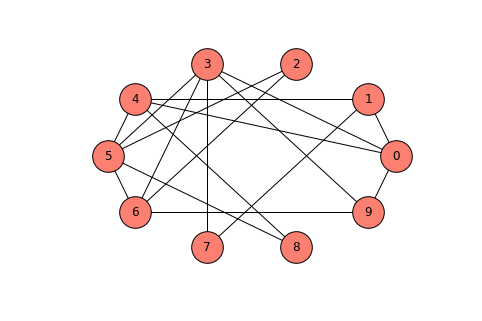

In [27]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [28]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [29]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [30]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [31]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [32]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [33]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [34]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

False

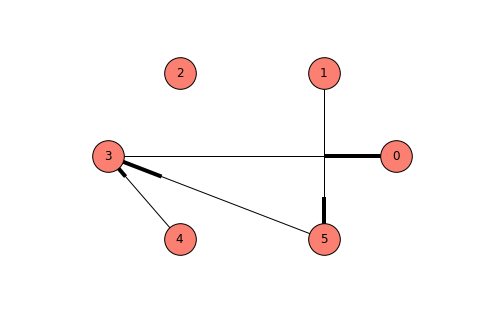

In [35]:
def random_pairs_di(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v
            if i<j and flip(p):
                yield v, u
                
def make_random_digraph(n, p):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs_di(nodes, p))
    return G

random_digraph = make_random_digraph(6,.3)

nx.draw_circular(random_digraph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)

#since G.neighbors(n) returns all nodes pointed to by but not pointing at node n, we can use the same functions                
is_connected(random_digraph)

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [36]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [37]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6539

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [53]:
pstar = np.log(n) / n
pstar

0.019012608248854004

So let's plot the probability of connectivity for a range of values for `p`

In [39]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [40]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.001
0.0912010839356 0.004
0.123026877081 0.026
0.165958690744 0.114
0.223872113857 0.317
0.30199517204 0.683
0.407380277804 0.914
0.549540873858 0.993
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

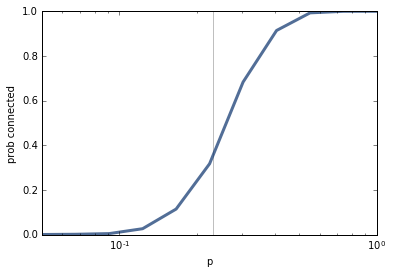

In [41]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

KeyboardInterrupt: 

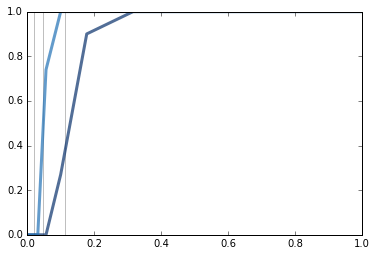

In [42]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [ ]:
# O (n^2 + nm)

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [43]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(n for n in G.neighbors(node)if node not in seen )
    return seen

In [ ]:
# This method doesn't change anything because the checking happens before as opposed to after

In [45]:
%timeit len(reachable_nodes(complete, 0))

10000 loops, best of 3: 154 µs per loop


In [46]:
%timeit len(reachable_nodes_precheck(complete, 0))

The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 26.1 µs per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [63]:
def m_pairs(nodes,m):
   return random.sample([x for x in all_pairs(nodes)],m)
m_pairs([0,1,2,3,4],4)

[(2, 3), (1, 4), (1, 3), (0, 1)]

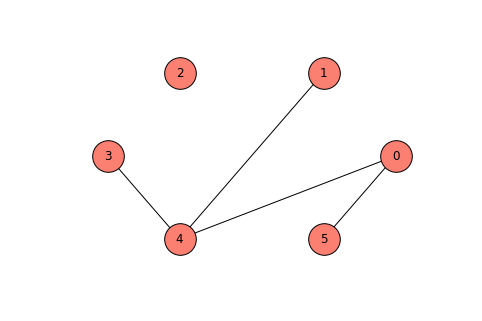

In [73]:
def make_m_graph(n,m):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(m_pairs(range(n),m))
    return G

nx.draw_circular(make_m_graph(6,6), 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)

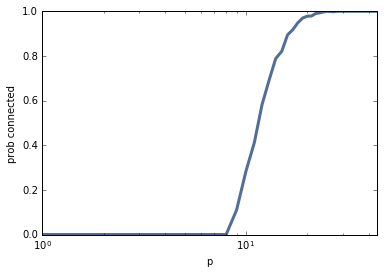

In [75]:
import thinkplot

def prob_connected_2(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

ms = range(45)
ys = [prob_connected_2(10,m,1000) for m in ms]

thinkplot.plot(ms, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ms[0], ms[-1]])

In [ ]:
# Here are the set of notes produced by my second time reading through Chapter 1, after having heard the panel.

# ======NOTES=======

# "the schelling model is highly abstract, which is to say not realistic". What models are not abstractions? 
# I guess this begins to get at the question of how models are created in the first place (as opposed to how models are judged or how constants are decided on)
# This thought i'm struggling to articulate may be "what is the relationship between "models","engineering",and "thinking", 
# and have these three categories always together composed the field of science?

#there are about two dozen shifts described in this chapter. can we think of any of them as more fundamental or logically prior? (probably not)
#for example, is there a succint abstraction of the respective shifts in "models","engineering", and "thinking"?

# realism --> instrumentalism more about shift in definition of "real" rather than in belief of realness